<a href="https://colab.research.google.com/github/377Harun/BirliktelikAnaliziApi/blob/main/googlecolabJupyterNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import missingno as msno
import seaborn as sns


In [ ]:
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
X = df.drop("Sales",axis = 1)
y = df["Sales"]
train_x , test_x , train_y , test_y = train_test_split(X , y  , test_size=0.25)

model = LinearRegression(fit_intercept=True)
model.fit(train_x , train_y)


LinearRegression()

In [ ]:
tahmin = model.predict(test_x)

print("test hatası :" , r2_score(test_y ,tahmin ))

test hatası : 0.8796505118371218


In [ ]:

tahmin_train = model.predict(train_x )
print("train hatası  : " ,  r2_score(train_y , tahmin_train ))

train hatası  :  0.9101446734594416


In [11]:
mse = mean_squared_error(y_true=test_y , y_pred=tahmin)


print("means squared error  : " , mse)

means squared error  :  3.449806043240085


In [ ]:
msno.matrix(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


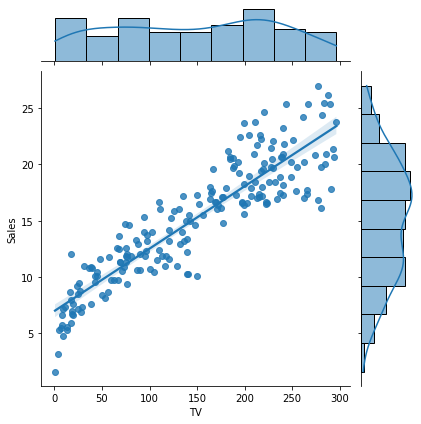

In [17]:
sns.jointplot(df["TV"] , df["Sales"] , kind="reg")

In [49]:
import statsmodels.api as sm
SMmodel = sm.OLS(train_y , train_x)
sonuc = SMmodel.fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2272.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):                   6.93e-123
Time:                        09:59:30   Log-Likelihood:                         -340.45
No. Observations:                 150   AIC:                                      686.9
Df Residuals:                     147   BIC:                                      695.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0669      0.002     38.414      0.000       0.063       0.070
Radio          0.1574      0.013     11.992      0.000       0.131       0.183
Newspaper      0.0295      0.009      3.318      0.001       0.012       0.047
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.029
Skew:                           0.002   Prob(JB):                        0.986
Kurtosis:                       3.068   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
tahminOLS = sonuc.predict(test_x)

In [51]:
sonuc.params

TV           0.066874
Radio        0.157351
Newspaper    0.029472
dtype: float64

In [45]:
sonuc.rsquared

0.9788849350423843

In [46]:
sonuc.pvalues

TV           1.531050e-78
Radio        1.547721e-23
Newspaper    1.144486e-03
dtype: float64

In [47]:
sonuc.pvalues["TV"]
sonuc.pvalues["Radio"]
sonuc.pvalues[sonuc.pvalues.index.str.contains("New")]

1.5477205440081107e-23

In [52]:
sonuc.rsquared

0.9788849350423843

In [54]:
sonuc.aic
sonuc.bic

695.9285000306517